# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-15 00:42:16.407254: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-15T00:42:19.572118
2025-04-15 00:42:19.572118


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 6
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close %'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-15 00:42:13"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

IBOVESPA - Close  IBOVESPA - High  IBOVESPA - Low  IBOVESPA - Open  \
0          0.000000         0.000000        0.000000         0.000000   
1          0.000150         0.000150        0.000049         0.000034   
2          0.000299         0.000406        0.000200         0.000183   
3          0.000468         0.000484        0.000350         0.000333   
4          0.000703         0.000704        0.000519         0.000502   

   Dólar - Close  Dólar - High  Dólar - Low  Dólar - Open  Dow Jones - Close  \
0            0.0           0.0          0.0           0.0           0.003941   
1            0.0           0.0          0.0           0.0           0.004600   
2            0.0           0.0          0.0           0.0           0.004961   
3            0.0           0.0          0.0           0.0           0.005083   
4            0.0           0.0          0.0           0.0           0.005490   

   Dow Jones - High  ...  IBOVESPA - Spread %  Kospi - Spread %  \
0          0.003148  ...             0.000000               0.0   
1          0.003605  ...             0.036606               0.0   
2          0.003965  ...             0.020442               0.0   
3          0.004311  ...             0.008583               0.0   
4          0.004630  ...             0.015204               0.0   

   Minério de Ferro - Spread %  Nasdaq - Spread %  Nikkei - Spread %  \
0                          0.0           0.000000           0.000000   
1                          0.0           0.029525           0.000000   
2                          0.0           0.119266           0.201590   
3                          0.0           0.056198           0.049836   
4                          0.0           0.182793           0.129181   

   Petróleo Brent - Spread %  Petróleo WTI - Spread %  S&P 500 - Spread %  \
0                        0.0                      0.0            0.000000   
1                        0.0                      0.0            0.084905   
2                        0.0                      0.0            0.065165   
3                        0.0                      0.0            0.095393   
4                        0.0                      0.0            0.162195   

   STOXX 600 - Spread %  Shanghai SE - Spread %  
0                   0.0                     0.0  
1                   0.0                     0.0  
2                   0.0                     0.0  
3                   0.0                     0.0  
4                   0.0                     0.0  

[5 rows x 200 columns]

Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

IPCA %                        -0.104904
INPC %                        -0.104528
IBOVESPA - Spread             -0.090141
Nasdaq - Spread %             -0.083494
FTSE 100 - Spread             -0.077431
CAC 40 - Spread               -0.075797
Taxa acumulada no período %   -0.072398
STOXX 600 - Spread            -0.070673
FTSE MIB - Spread             -0.070577
STOXX 600 - Spread %          -0.070486
CAC 40 - Spread %             -0.069626
FTSE MIB - Spread %           -0.067484
Dow Jones - Spread            -0.067139
S&P 500 - Spread %            -0.065647
S&P 500 - Spread              -0.065500
DAX - Spread                  -0.061319
Dólar - Spread                -0.056498
Nasdaq - Spread               -0.055014
FTSE 100 - Spread %           -0.054914
Petróleo WTI - Spread         -0.054419
Kospi - Spread %              -0.054199
Shanghai SE - Open %          -0.053242
Petróleo WTI - Spread %       -0.052938
PIB %                         -0.052670
Dow Jones - Spread %          -0.050204


In [11]:
corr.index

Index(['IPCA %', 'INPC %', 'IBOVESPA - Spread', 'Nasdaq - Spread %',
       'FTSE 100 - Spread', 'CAC 40 - Spread', 'Taxa acumulada no período %',
       'STOXX 600 - Spread', 'FTSE MIB - Spread', 'STOXX 600 - Spread %',
       ...
       'S&P 500 - Low %', 'DAX - Close %', 'CAC 40 - Close %',
       'FTSE 100 - Close %', 'Nasdaq - Close %', 'Dow Jones - Close %',
       'S&P 500 - Close %', 'IBOVESPA - Low %', 'IBOVESPA - High %',
       'IBOVESPA - Close %'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

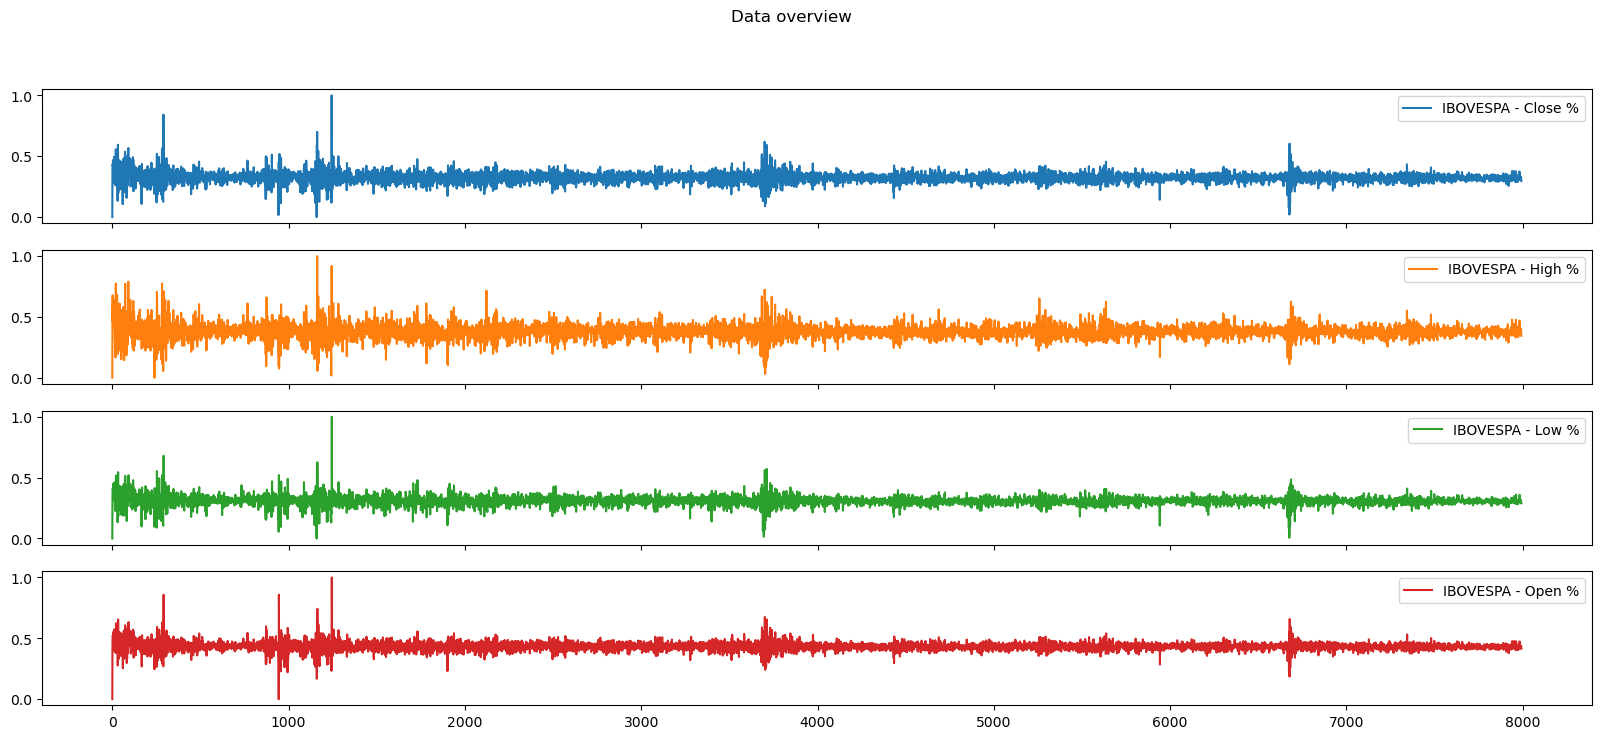

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

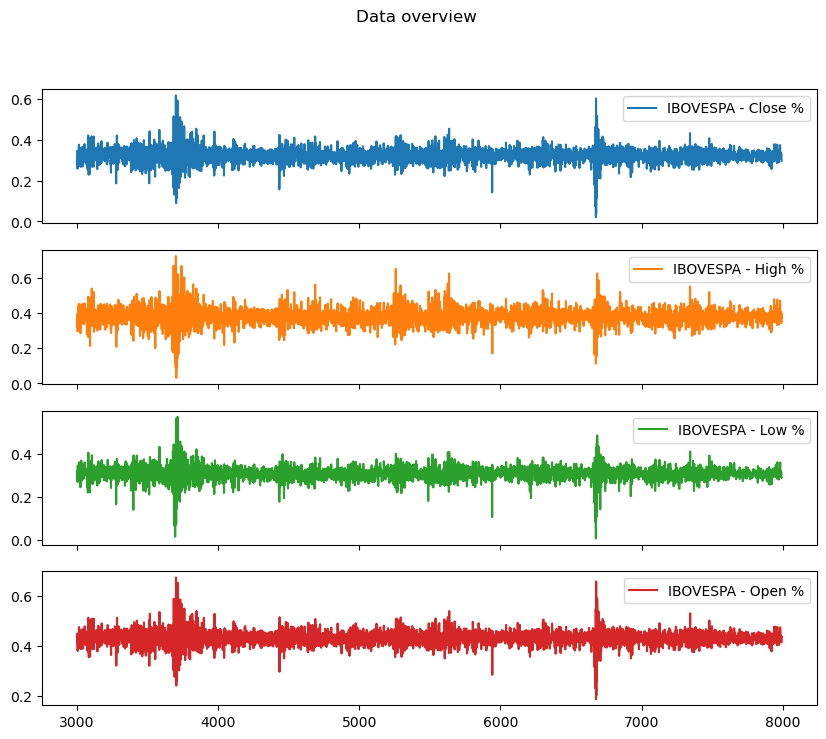

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

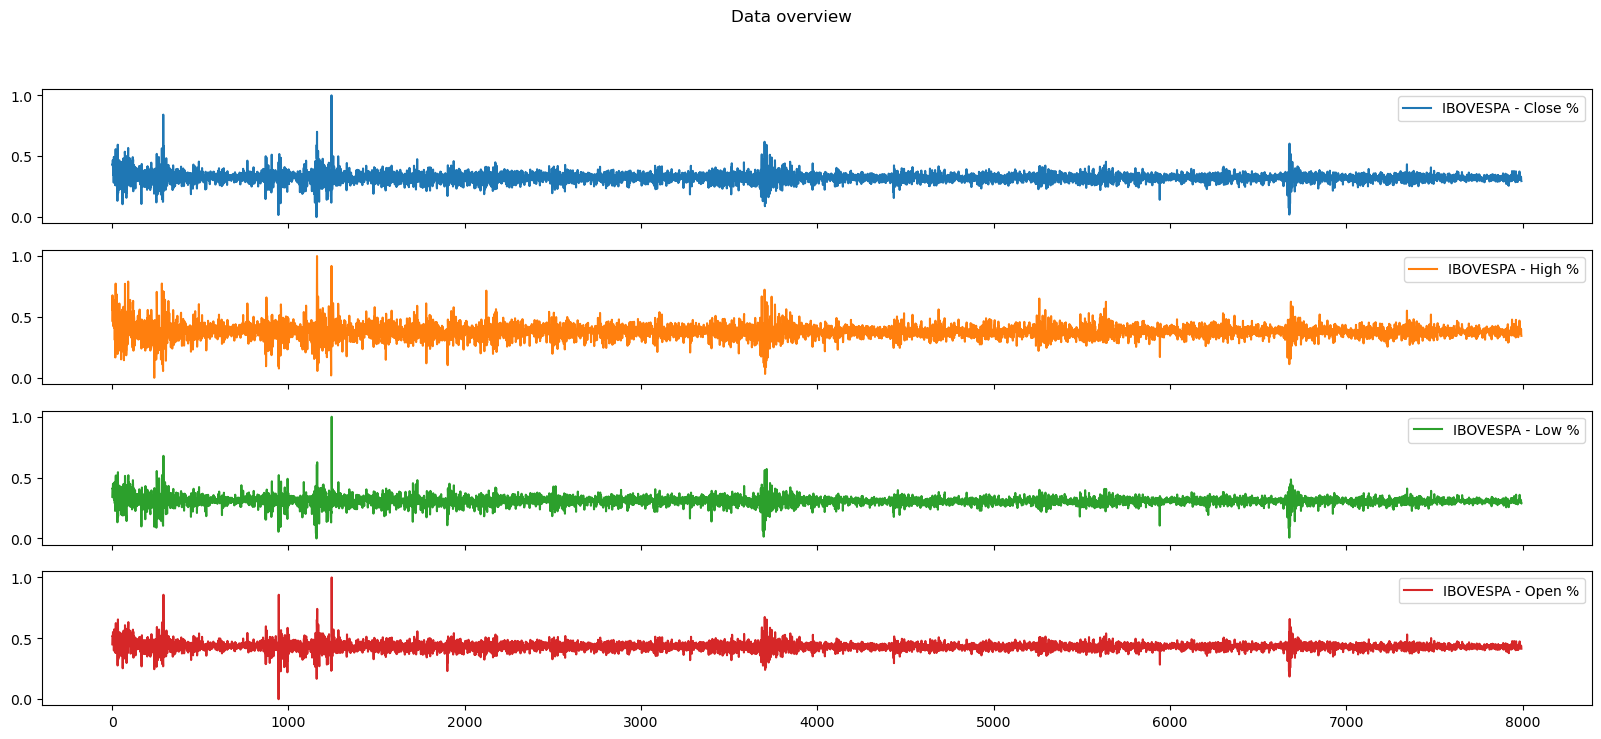

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close %']

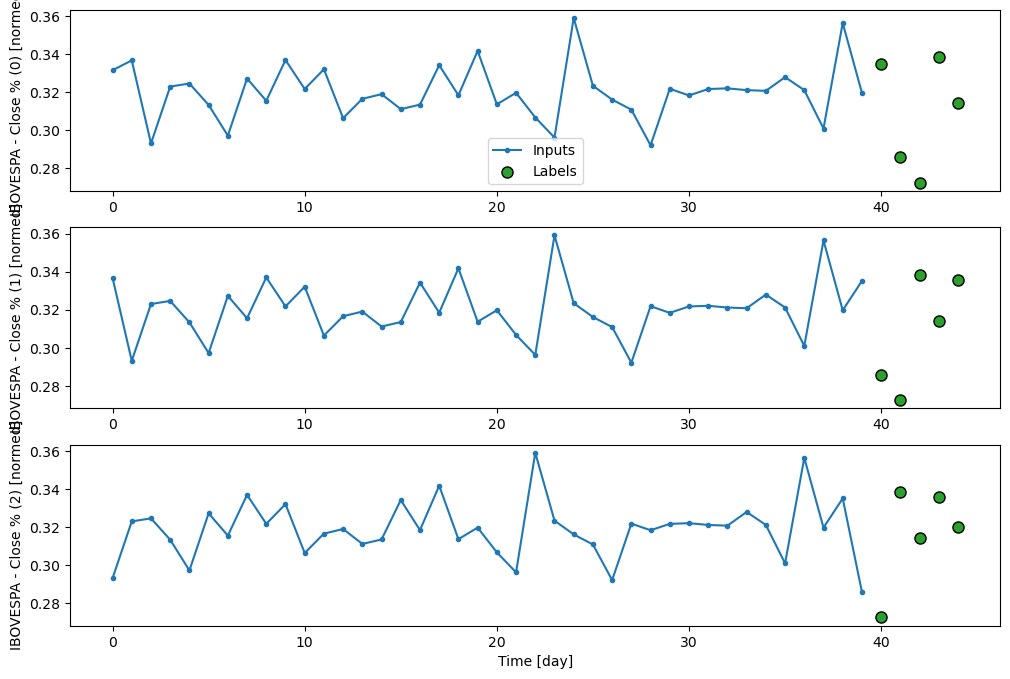

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

4

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 8:39 2s/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3539

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3168 - mean_absolute_error: 0.3168 - mean_absolute_percentage_error: 91.8360 - mean_squared_error: 0.1109 - root_mean_squared_error: 0.3324 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2981 - mean_absolute_error: 0.2981 - mean_absolute_percentage_error: 86.8262 - mean_squared_error: 0.0993 - root_mean_squared_error: 0.3140

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2827 - mean_absolute_error: 0.2827 - mean_absolute_percentage_error: 82.9957 - mean_squared_error: 0.0901 - root_mean_squared_error: 0.2987

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2724 - mean_absolute_error: 0.2724 - mean_absolute_percentage_error: 80.0937 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2899

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2626 - mean_absolute_error: 0.2626 - mean_absolute_percentage_error: 77.3630 - mean_squared_error: 0.0805 - root_mean_squared_error: 0.2815

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2524 - mean_absolute_error: 0.2524 - mean_absolute_percentage_error: 74.4761 - mean_squared_error: 0.0761 - root_mean_squared_error: 0.2731

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 71.7296 - mean_squared_error: 0.0721 - root_mean_squared_error: 0.2653

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 67.8287 - mean_squared_error: 0.0667 - root_mean_squared_error: 0.2543

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 65.5003 - mean_squared_error: 0.0636 - root_mean_squared_error: 0.2477

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 62.2744 - mean_squared_error: 0.0595 - root_mean_squared_error: 0.2386

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2034 - mean_absolute_error: 0.2034 - mean_absolute_percentage_error: 60.3449 - mean_squared_error: 0.0571 - root_mean_squared_error: 0.2331

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1973 - mean_absolute_error: 0.1973 - mean_absolute_percentage_error: 58.5761 - mean_squared_error: 0.0549 - root_mean_squared_error: 0.2280

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1918 - mean_absolute_error: 0.1918 - mean_absolute_percentage_error: 57.1222 - mean_squared_error: 0.0529 - root_mean_squared_error: 0.2233

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1867 - mean_absolute_error: 0.1867 - mean_absolute_percentage_error: 55.7541 - mean_squared_error: 0.0510 - root_mean_squared_error: 0.2189

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1819 - mean_absolute_error: 0.1819 - mean_absolute_percentage_error: 54.4800 - mean_squared_error: 0.0493 - root_mean_squared_error: 0.2148

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1776 - mean_absolute_error: 0.1776 - mean_absolute_percentage_error: 15270.2041 - mean_squared_error: 0.0478 - root_mean_squared_error: 0.2110

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1718 - mean_absolute_error: 0.1718 - mean_absolute_percentage_error: 33786.6758 - mean_squared_error: 0.0457 - root_mean_squared_error: 0.2060

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1682 - mean_absolute_error: 0.1682 - mean_absolute_percentage_error: 43851.1992 - mean_squared_error: 0.0445 - root_mean_squared_error: 0.2028

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1649 - mean_absolute_error: 0.1649 - mean_absolute_percentage_error: 52453.8125 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.1998

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1617 - mean_absolute_error: 0.1617 - mean_absolute_percentage_error: 59834.6055 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.1970

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1586 - mean_absolute_error: 0.1586 - mean_absolute_percentage_error: 66187.2266 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1943

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1558 - mean_absolute_error: 0.1558 - mean_absolute_percentage_error: 71669.2344 - mean_squared_error: 0.0402 - root_mean_squared_error: 0.1917

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1531 - mean_absolute_error: 0.1531 - mean_absolute_percentage_error: 76409.8438 - mean_squared_error: 0.0393 - root_mean_squared_error: 0.1892

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1505 - mean_absolute_error: 0.1505 - mean_absolute_percentage_error: 80515.8281 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1868

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1480 - mean_absolute_error: 0.1480 - mean_absolute_percentage_error: 84076.0000 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1845

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1456 - mean_absolute_error: 0.1456 - mean_absolute_percentage_error: 87164.7109 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1824

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1434 - mean_absolute_error: 0.1434 - mean_absolute_percentage_error: 89844.5391 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1803

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1402 - mean_absolute_error: 0.1402 - mean_absolute_percentage_error: 93211.3359 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1773

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1382 - mean_absolute_error: 0.1382 - mean_absolute_percentage_error: 95083.8203 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1754

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1362 - mean_absolute_error: 0.1362 - mean_absolute_percentage_error: 96701.1250 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1735

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 98093.9219 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1717

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1326 - mean_absolute_error: 0.1326 - mean_absolute_percentage_error: 99288.6797 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1700

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 100758.8594 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1676

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1284 - mean_absolute_error: 0.1284 - mean_absolute_percentage_error: 101552.4922 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1660

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 102503.9922 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1637

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 102999.1719 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1623

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1232 - mean_absolute_error: 0.1232 - mean_absolute_percentage_error: 103396.9922 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1609

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 103833.5391 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1588

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 104030.7734 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1575

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 104162.0547 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1562

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1167 - mean_absolute_error: 0.1167 - mean_absolute_percentage_error: 104250.0312 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1544

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 104244.6562 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1532

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 104153.3906 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1514

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 103975.5078 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1497

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 103815.2188 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1487

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 103625.5000 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1476

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 103409.3281 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1466

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1080 - mean_absolute_error: 0.1080 - mean_absolute_percentage_error: 103169.4141 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1456

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 102908.1875 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1446

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1057 - mean_absolute_error: 0.1057 - mean_absolute_percentage_error: 102481.1406 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1431

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 102017.6172 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1418

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 101691.1562 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1409

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 101179.0234 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1396

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 100824.5547 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1388

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 100461.0312 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1380

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 100089.5078 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1372

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 99710.9531 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1364 

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 99131.8594 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1353

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 98739.4219 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1345

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 98342.7266 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1338

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 97942.3984 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1331

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 97539.0234 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1323

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 97133.1406 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1317

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 96725.2266 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1310

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 96110.5156 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1300

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 95699.3906 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1293

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 95287.6406 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1287

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 94875.5703 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1280

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 94257.5234 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1271

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 93640.3281 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1262

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 93229.7188 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1256

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 92615.6094 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1248

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 92004.1953 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1239

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 91598.3516 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1233

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 90992.5781 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1225

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 90590.9062 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1220

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 90191.1094 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1215

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 89793.2891 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1210

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 89397.5156 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1204

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 89003.8906 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1199

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 88612.4688 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1194

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 88029.6250 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1187

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 87643.9922 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1182

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 87260.7734 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1178

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 86880.0000 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1173

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 86501.7031 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1168

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 86125.9297 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1164

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 85752.6953 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1159

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 85382.0312 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1155

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 85013.9453 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1151

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 84466.7031 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1144

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 84105.1484 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1140

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 83567.7422 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1134

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 83036.2656 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1128

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 82685.2422 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1124

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 82163.6406 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1118

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 81819.1953 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1114

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 81477.3750 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1110

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 81138.1719 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1107

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 80801.5703 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1103

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 80301.5391 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1097

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 79971.4219 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1094

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 79643.8594 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1090

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 79157.9141 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1085

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 78998.3125 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1083 - val_loss: 0.0132 - val_mean_absolute_error: 0.0132 - val_mean_absolute_percentage_error: 4.0495 - val_mean_squared_error: 2.7570e-04 - val_root_mean_squared_error: 0.0166 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 28.5513 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1016

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 25.9967 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 23.3183 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0915

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 23.2081 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0905

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.1389 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 22.7381 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0888

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 22.2355 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 21.6892 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0856

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 21.1316 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 20.6026 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0822

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 20.0777 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 19.5877 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 18.9523 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.6257 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.4689 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 7977.0698 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 21987.9004 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 33849.7734 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 48425.1172 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 56413.6602 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 63279.0352 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 69196.2344 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 74308.2266 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 80718.2891 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 84289.2812 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 87387.4375 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 91282.7031 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 93452.7422 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 96172.2656 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97678.5312 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 98973.3828 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 100572.3906 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 101439.8047 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 102486.7656 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 103036.8828 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 103483.6328 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 103983.8203 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 104217.8359 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 104440.1328 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 104528.7969 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 104523.6953 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 104432.5781 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 104322.7266 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 104178.2188 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 104002.5547 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 103798.9141 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 103447.1250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 103185.3750 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 102757.4219 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 102451.4297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 102130.9062 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 101626.2578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 101275.9375 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 100732.6953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 100360.2891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 99980.8281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617 

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 99595.1953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 99204.2031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 98808.5859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 98207.9375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 97600.3984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 97192.4219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 96577.2031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 96165.4922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 95752.9688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 95133.3984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 94720.2656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 94101.1094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 93483.3359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93072.6016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 92458.6484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92051.0156 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 91644.8906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91240.4141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 90837.7031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90237.1875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 89839.3438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89246.5469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 88854.1094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 88463.9453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 87883.0938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 87498.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 86927.1406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86361.0469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 85986.8281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85430.3281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85062.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84515.8516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 83975.0547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83617.8125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83263.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82736.2734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82388.2812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82042.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81700.1953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81360.0859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 80854.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 80521.2344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 80025.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 79535.9375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 79214.5312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.8037 - val_mean_squared_error: 2.4101e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.5623 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1006

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 24.9748 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0966 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 23.2937 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0911

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.1072 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0899

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 22.5811 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 22.0680 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.2327 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.4274 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 19.9046 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.4168 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0786

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 18.9741 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0773

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.5328 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.3162 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.1762 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 21895.3906 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 38932.9727 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 48221.4648 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 56176.4219 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 63012.9336 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 71542.8984 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 78401.6406 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 82220.0703 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 85532.1328 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 88405.9141 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 90898.8906 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 94029.0000 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 95767.9062 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 97937.2422 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 99130.8281 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 100149.5469 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 101392.6172 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 102055.8750 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 102838.2656 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 103235.8984 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 103546.6484 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 103869.6328 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 104001.0469 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 104089.3359 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 104084.2500 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 104034.0703 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 103884.1328 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 103740.2344 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 103565.3203 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 103362.5312 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 103012.2266 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 102613.9609 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 102325.4297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 101862.8359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 101537.0234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 101199.0156 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 100850.1719 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 100491.7031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 99938.3672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618 

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 99369.2188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 98982.4375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 98590.7031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 98194.6953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 97795.0625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 97392.3906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 96987.2031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 96579.9844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 96171.1797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 95761.2031 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 95144.8203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 94733.4453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 94322.0469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 93910.9062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 93500.2500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 92885.6875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 92477.2188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 91866.8047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 91259.6094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 90856.8281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90255.9922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 89659.4688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 89264.3359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 88675.6641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88092.0234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 87705.8281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87131.0078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 86561.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86185.2422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 85997.9688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 85625.3203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85071.1641 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84704.9609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84160.5312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83800.8594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83443.8047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82913.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82562.6875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82214.8438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 81869.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81527.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81018.0312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 80681.9609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 80182.7031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 79853.0938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 79526.0469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 79040.8516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 78881.5000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8419 - val_mean_squared_error: 2.4509e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.5290 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 25.9572 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0982 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 23.4563 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0899

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.5498 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 23.6139 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 23.2775 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0880

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.8008 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0866

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 22.2633 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0850

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 21.7030 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0834

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 20.9033 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0811

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 20.3877 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0795

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 19.9073 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0781

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 19.4959 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 19.2260 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0759

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 19.0675 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.8289 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 15729.7812 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 28992.8594 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 45241.3984 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 54124.2617 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 65147.1953 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 71239.0938 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 76502.0078 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 83101.3203 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 86777.7500 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 89967.3672 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 92734.8047 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 95134.7656 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 97213.7656 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 99011.5703 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 100562.3047 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 101895.3828 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 103036.2422 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 104006.9609 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 105185.4375 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 105809.7500 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 106321.3906 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106732.4844 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107183.7188 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107387.6875 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107523.5469 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 107614.8281 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 107609.5703 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 107557.6875 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 107463.9219 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 107332.5078 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 107167.2734 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 106971.6328 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 106748.6875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 106501.2188 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 106089.4609 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 105791.1562 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 105312.8906 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 104976.0391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 104626.5859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 104081.7891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 103706.6406 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 103323.2344 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 102932.5703 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 102334.9297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 101725.7188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 101314.3438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 100691.0156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 100272.1016 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 99851.0938 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608 

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 99428.4453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 99004.5781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98367.3203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 97729.3281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 97304.0938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96667.0469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 96243.2344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 95820.3672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 95398.6562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 94978.2656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 94350.5078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 93934.0859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93312.8984 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 92901.2266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 92491.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92084.2188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 91679.0391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91276.1797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 90875.6875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90477.6328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90082.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89493.4531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89104.2578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88525.3750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88142.7578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 87762.8047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87385.5391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87010.9688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86454.2031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86086.4141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85721.3438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85359.0000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84820.5781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84288.2578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83936.7578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83587.9609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83241.8438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82898.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82557.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82219.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81717.8672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81553.1172 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.7878 - val_mean_squared_error: 2.3719e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4916 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 25.9746 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0987 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 23.3033 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.2517 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 23.0137 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 22.2917 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0861

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 21.7461 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0845

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 21.1857 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0828

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 20.6540 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0812

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 20.1286 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0797

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.4014 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0775

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 18.9954 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0762

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.6577 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.4216 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 8337.6055 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 29436.3105 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 40867.6133 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 50617.8398 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 62690.8594 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 69351.0781 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 77673.3906 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 82298.2891 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 86306.5391 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 91345.0781 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 94154.9219 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 96591.6562 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 98702.5156 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 100527.8672 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 102102.3672 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 103455.8750 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104614.2188 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105599.8125 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106796.3438 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107430.2344 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107949.7109 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108540.9844 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108825.2656 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109032.3594 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109170.3125 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 109262.9922 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 109257.6641 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 109204.9844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 109109.7812 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 108976.3594 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108712.9375 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 108500.0703 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 108132.3516 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 107858.7422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 107565.0938 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 107091.5547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 106756.5156 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 106229.0156 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105675.8672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 105294.9766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104708.2344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 104105.9531 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103697.2500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 103283.7109 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102866.0391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 102233.1641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101594.3438 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 101165.9922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100520.8984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99873.8750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595 

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 99442.0469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 99010.2031 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98578.6172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 98147.5547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97502.4453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97073.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96432.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95795.5391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95372.7344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94742.0391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94324.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93908.2031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93494.5391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93083.1562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92470.5000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92065.1094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91461.7188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90864.0859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90468.9375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89881.1875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89492.7109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89106.9375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88723.8906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88343.5859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87778.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87404.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86849.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86483.3984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86119.6406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85579.1719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85222.2891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84692.0938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84342.0391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83994.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83478.7266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83138.1016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82802.1406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.9079 - val_mean_squared_error: 2.5396e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 28.4241 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1006

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 25.9883 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0992 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 23.3239 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0907

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 23.2421 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 23.2023 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 22.8184 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 22.3243 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0865

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.4983 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 20.9576 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0824

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.1637 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.4338 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 19.0262 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.6867 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.5233 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.3726 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 22924.6367 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 35292.2461 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 50489.0156 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 62531.2969 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 69174.5469 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 77475.6719 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 84159.0391 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 87882.2969 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 92563.6562 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 96345.7656 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 98451.2422 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 101086.5078 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 103192.5000 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104347.8906 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 105330.9766 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106161.2344 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107156.7344 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107674.8906 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108091.2266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108416.5938 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108660.5938 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108892.3750 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108968.1328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108988.3906 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108926.9609 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 108832.0000 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 108619.3047 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 108333.4531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 108107.6719 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107723.2344 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 107291.2422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106980.4297 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106484.7266 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105958.5625 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105593.3047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105217.9766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104833.7422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104441.6562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 104042.6953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103637.7266 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 103020.7656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102604.1562 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101972.8906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101335.6953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100908.4375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100264.9844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99834.8750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596 

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99404.2656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98973.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98542.8438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98112.5938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97682.9766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97040.2344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96613.1484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96187.4062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95763.1641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95340.5703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94919.7578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94500.8359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93876.2578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93462.5391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93051.0547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92641.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92032.6016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91629.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91228.8672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90632.7656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90238.6172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89652.3672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89264.8750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88880.0859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88308.0078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87930.0391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87554.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86997.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86628.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86081.4688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85720.0156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85361.3047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85005.3281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84652.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84301.5625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83953.7500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83608.6406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83266.2109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82758.1875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82591.3438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.8043 - val_mean_squared_error: 2.3893e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4635 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 25.9798 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0986 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 24.0700 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0926

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 23.1106 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0887

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.3514 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 22.9225 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0877

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 22.4351 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0862

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.6126 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.8042 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0813

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 20.2746 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0798

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.5403 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 19.1298 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.8619 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.6193 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.4651 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 22887.3203 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 40697.1680 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 50406.6836 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 62429.2930 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 72028.0234 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 77349.2656 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 84021.7109 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 87738.8906 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 90963.8594 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 93761.9688 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0696

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 96188.5234 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 98290.5703 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 100921.5312 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 102375.9688 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103623.6562 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105159.0625 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105987.9688 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106681.2891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107253.9297 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107718.9688 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108087.9453 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108483.2344 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108654.0938 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108759.7500 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108806.9297 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108801.6172 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 108706.7734 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 108592.4297 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 108442.0000 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 108156.6172 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 107931.2031 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 107547.3906 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 107264.6719 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106963.0625 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106644.5391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 106310.8984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105963.7578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105604.6016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105234.7578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104855.4531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104271.1641 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103872.8516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103264.3984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102852.5859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102436.6562 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 102017.2500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101594.9375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100957.1953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100529.8672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99886.6797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596 

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 99241.9922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98811.9219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98167.1328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97523.5078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97095.4531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96668.4688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96242.7344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95606.8359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94974.6328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94555.4375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94138.1953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93723.0078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93309.9609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92694.6094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92287.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91882.3594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91279.6016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90880.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90287.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89895.5391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89312.2422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88734.9922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88353.5469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87974.8281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87598.8438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87225.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86670.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86304.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85760.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85221.9453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84866.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84338.5781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83989.9844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83644.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83300.8750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82791.0703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82456.5078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.8921 - val_mean_squared_error: 2.5111e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.4166 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 24.9482 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0962 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 23.0550 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0893

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.2353 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 22.9901 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.5211 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 21.9942 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0857

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 21.4377 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 20.8964 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0824

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.1019 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.6081 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0785

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.9654 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.6272 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.4650 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 8352.3711 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 23023.9023 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 35445.1445 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 50707.8125 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 59073.0664 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 69474.3750 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 77811.4922 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 82444.6172 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 88263.2422 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 92964.9062 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 95586.4609 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 98878.0234 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 100706.6250 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 101524.7188 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 102987.8516 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104800.2422 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105787.5938 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106986.2500 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107621.2734 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108141.6719 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108559.8125 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108886.5938 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109226.2422 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109364.4375 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 109457.2891 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 109431.1719 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 109356.5312 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 109241.5078 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 109090.1875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 108906.2500 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 108576.3359 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 108190.2344 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 107905.8281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 107444.2109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 107115.9688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 106773.3516 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 106235.8359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105863.7891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 105288.2188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104894.4375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 104291.0859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 103675.0781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 103258.6562 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 102627.0547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101988.8828 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 101560.6641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100915.3516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 100267.6875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 99835.2109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594 

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 99186.2812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98537.9375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 98106.4609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97460.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96818.0234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96391.1719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95753.8984 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95120.6484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94700.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94075.2109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93660.8125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93248.6953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92838.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92431.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91825.2266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91224.6016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90827.4297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90432.8984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90041.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89651.8672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89265.4141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88881.6875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88311.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87934.3984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87374.3125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86820.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86454.6641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86091.6406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85731.3672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85373.8516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 85019.0781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84492.0391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83971.1094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83627.1953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83116.9688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82949.3984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8782 - val_mean_squared_error: 2.4912e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4227 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 24.9534 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0963 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 23.3138 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0908

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.2031 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 22.7199 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 22.2189 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0865

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 21.3888 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.5810 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0816

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.0544 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.5615 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0785

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.1132 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.7356 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0759

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.5036 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.3477 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 16071.9443 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 29624.3457 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 41128.7461 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 50941.3203 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 59345.1172 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 69794.3438 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 75578.6094 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 82824.3516 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 88669.7891 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 91928.9922 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 94756.8047 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 97209.1172 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 100285.6016 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 102755.0703 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104117.2344 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 105282.9766 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 106274.8750 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107479.0625 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108391.9844 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108861.9609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109388.1562 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109729.3672 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 109868.2031 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 109961.4766 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 109935.2422 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 109860.2578 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 109744.7031 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 109592.6875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 109304.2734 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 108953.0000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 108688.5859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 108402.8672 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108098.0625 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 107776.1562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 107265.1719 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 106908.1016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 106351.4219 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 105968.0938 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 105576.3281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 104975.0625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 104566.4688 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 103943.9766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103312.1094 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 102886.7109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102243.8047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101596.6094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101163.5000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100512.3438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 99860.4375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592 

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99425.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 98991.8203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98558.3516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 97909.8516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97263.9844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96835.1641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96194.9609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95770.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 95347.6953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94717.5234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94300.0938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93678.2109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93061.6406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92653.6562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92248.1875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91845.2734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91444.9609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91047.2812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90652.2734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90064.8125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89676.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89099.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88528.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88151.1797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87776.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87405.1250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87036.2656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86670.1797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86126.2578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 85588.5469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 85233.5078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84706.0938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84357.8828 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84012.3828 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83499.8125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83331.4688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8700 - val_mean_squared_error: 2.4771e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.4124 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 26.0120 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0995 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 23.2732 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0911

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.0700 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 22.7797 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 22.2879 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0874

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 21.4739 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0849

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 20.9120 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0832

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 20.1170 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 19.6079 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.1353 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.7331 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4731 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2434 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0741

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.0987 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 16131.8330 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 29734.9414 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 41282.3828 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 55510.6523 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 63327.3594 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 73064.2734 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 80881.9219 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 85230.6250 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 90695.0156 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 93742.3047 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 96385.7969 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 99704.8984 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 101548.7969 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103849.1172 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 105114.7656 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 106194.9844 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107513.1094 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108216.4219 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109046.0547 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109643.3359 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109930.5078 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110139.7109 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110279.0625 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110355.7812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110376.3047 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110314.1016 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110217.9297 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110002.5312 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 109713.0391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109484.3828 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109095.0547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108808.2656 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108502.3203 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108011.8047 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107666.3203 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107307.9141 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 106938.0078 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106557.8984 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106168.7656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 105771.6953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105367.6484 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 104957.5234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 104332.7031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 103910.7891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103271.4844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 102626.1797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101976.5625 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101541.8281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101106.2422 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100670.1562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100015.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 99579.8281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589 

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99144.3906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98709.7109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 98276.0156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97843.5000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 97197.3125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96768.4844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 96341.3906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95704.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 95282.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94652.7656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94236.0391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93821.6562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93409.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93000.1719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 92593.1797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92188.7656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91587.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90991.2969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90597.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90011.9531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89625.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89240.8516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88859.4609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 88480.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87918.1797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87361.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86994.3203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86448.3594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86087.8516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85730.1094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85375.1250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85022.8828 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84499.6406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84154.2031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 83643.1250 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8614 - val_mean_squared_error: 2.4661e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4204 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 26.0027 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0993 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 23.2823 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0908

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.1149 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 22.8376 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 22.0921 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 21.5411 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 20.9801 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0831

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 20.1841 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 19.6738 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.1998 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 18.7961 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.4617 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.3018 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.1553 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 23235.8398 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 35771.5977 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 51174.9766 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 59617.3594 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 66872.7656 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 73126.1328 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 78528.5391 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 85302.7734 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 89076.6484 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 92350.8203 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 96467.3828 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 98760.7188 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 100745.7891 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 102460.3828 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104595.0078 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 106284.8672 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 107201.5625 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108308.0156 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108889.3906 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109361.5312 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109736.1328 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110023.5469 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110310.9297 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110418.2031 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110469.7188 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110407.4609 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110311.2109 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110095.6250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 109909.9922 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109694.7812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109323.0156 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109046.3984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108594.1406 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108103.2109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107757.4375 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107214.9688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106839.4922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106454.4062 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106060.8438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105659.8203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105252.2891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105046.3438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104839.0859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 104421.0000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 103998.7266 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 103572.9219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103144.1719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 102713.0234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 102279.9609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 101845.4375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101409.8672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100755.3438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100318.7188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 99664.1016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99228.2891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98793.2422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98142.5781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97710.3516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 97064.7578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96636.4141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96209.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 95785.2656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95362.6953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94942.2500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94524.0312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93901.0469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93283.4844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92874.8828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92266.7656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91864.6172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91465.1172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91068.2891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90674.1719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90088.1172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89700.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89125.1562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 88555.7266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88179.5859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87806.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87435.6953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87067.9297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86521.5078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86160.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85624.6641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85270.7500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84919.5781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84397.9297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84053.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 83713.8906 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8415 - val_mean_squared_error: 2.4373e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4195 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 24.9515 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0965 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 22.9554 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.0480 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 22.7539 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.2602 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 21.4452 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 20.6184 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0822

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 20.0882 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 19.3397 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0783

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 18.7046 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.4448 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.2153 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.0711 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 16206.0137 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 35905.8008 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 51367.0391 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 59841.1289 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 67123.7812 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 73400.6406 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 81254.2891 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 87584.3594 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 91112.5703 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 94173.8984 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 96829.5625 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 100163.9453 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 102845.0703 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104327.2500 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 106163.2188 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 107163.4062 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 108008.1172 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 109020.9453 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109548.1250 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110148.1562 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110550.9922 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110725.1094 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110863.8828 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110884.5000 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110854.4219 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110725.3984 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110590.0000 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110419.7500 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110218.1797 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109863.9766 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109455.8359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109157.8438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108841.6250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108509.1172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108162.0391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107801.9844 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107430.3750 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106854.1172 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106459.0781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105852.7891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105440.7734 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105023.4766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104601.6328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104175.9219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103746.9766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103315.3438 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 102881.5547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102446.0859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101790.6406 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101352.7578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100914.5312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100476.2969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100038.3203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99382.4297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586 

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 98946.2188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98293.9922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 97860.8438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97429.2188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 96999.2734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96571.1328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96144.9297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95720.7656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95298.7500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94878.9609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94253.6406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93839.7656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93428.3672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93019.5078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92613.2188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92008.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91609.0625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91014.6484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90426.3906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90037.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89459.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89078.0703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 88699.1172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88135.9531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87764.0078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87211.3438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86664.9609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86304.1797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85946.1797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85590.9375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85238.4453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84714.8438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84369.1719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84028.2344 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8553 - val_mean_squared_error: 2.4562e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4227 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 26.0063 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0992 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 23.3118 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0908

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 23.1754 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 22.9237 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 22.1906 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0865

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 21.6427 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 21.0831 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0831

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.5513 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0815

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 20.0254 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.5332 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0857 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.6299 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.4769 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.2470 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 16134.8613 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 35747.8477 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 51140.9531 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 59577.7031 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 70067.9062 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 75874.8438 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 80896.5078 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 87198.6875 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 90711.3516 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 93759.1875 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 96403.1484 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 98694.9531 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 100678.6953 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 102392.1406 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 103867.7891 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 105133.6641 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 106691.4453 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 107532.4375 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108235.8672 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108816.8516 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0666

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109288.6797 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 109663.0312 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109950.2500 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110237.4375 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110344.6406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110396.1172 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110366.1719 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110290.8984 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110174.8906 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110022.2734 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 109836.7656 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109621.6953 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109250.1797 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 108973.7422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108521.7891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108031.1875 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 107685.6406 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107143.5312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106768.3047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106383.4766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105990.1719 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105589.4219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 104976.3516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104560.8906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 103929.4297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 103290.0156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102860.2891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 102211.8125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 101560.0469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101124.3750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100688.2109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100251.8750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 99815.6641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590 

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 99379.8516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 98944.6875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 98293.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97861.0469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97214.7422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96785.8359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 96358.6641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95721.4453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 95299.1484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94669.7344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94045.4141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93632.1484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93016.8438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92609.7812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 92205.2891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91603.4531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91205.5547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90613.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90222.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89834.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89256.8516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88875.3906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 88308.4297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87933.9375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87377.4297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86827.1953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86463.8516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86103.2812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85745.4766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85213.9297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84688.5469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84341.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 83827.1094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 83658.1094 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.8044 - val_mean_squared_error: 2.3871e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4321 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 24.9492 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0963 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 23.2504 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0908

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.0385 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 22.7161 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 22.2185 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0871

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 21.6780 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 21.1158 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 20.3080 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0813

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 19.5359 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 19.0642 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 18.4807 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 18.3318 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.1740 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 18.0298 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 16202.4287 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 35897.9023 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 46603.3828 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 59827.9883 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 67109.0547 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 73384.5312 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 81236.4609 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 85604.2344 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 91092.5859 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 94153.2500 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 96808.3281 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 100141.9844 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101993.9688 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104304.3750 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 106139.9375 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 107139.9141 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107984.4375 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108690.8359 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109274.2656 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 109748.0781 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110124.0078 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110526.7578 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110700.8359 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110839.5781 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110860.1875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110830.1172 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110701.1250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110565.7578 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110298.4922 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109964.3672 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109709.4453 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109285.2891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108817.7734 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108485.3359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107959.8750 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107406.8281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107025.0547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106435.7500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105829.5859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105417.6719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105000.4609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104578.7109 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104153.0938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103724.2422 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103076.1016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102423.6406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101987.0000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101330.5469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100892.4219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100454.2812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99797.6484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99360.6484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 98924.5312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98489.5078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98055.7500 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97623.4375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97192.7266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96549.9766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96123.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95699.7969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95067.7344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94649.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94025.7891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93613.2344 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93203.1875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92592.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92189.3516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91588.9922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90994.7031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90601.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90211.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89824.6719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89440.2109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88868.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88491.2969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88116.6328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87744.7734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87192.2266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86827.3594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86465.2656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85927.3438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85572.1797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85219.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84870.0938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84350.6797 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84009.8203 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.7850 - val_mean_squared_error: 2.3596e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4509 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 26.0162 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0991 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 24.0479 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0934

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 22.9416 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0893

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.0034 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 22.6918 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 21.9252 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 21.3692 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0846

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 20.8061 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0830

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 20.2760 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0813

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 19.5055 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 19.0350 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 18.6345 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 18.3035 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.1455 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 8489.1260 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 29972.9902 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 41612.9727 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 55955.2617 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 63834.6094 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 70616.4141 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 79090.6484 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 83799.9766 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 89714.3047 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 94493.2969 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 97157.9688 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 100503.6641 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 102362.3438 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103965.5859 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105956.8906 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 107045.7656 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108374.4609 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109390.7266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109919.6875 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110521.7578 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110925.9609 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 111100.6719 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111208.7188 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111256.9609 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111251.5312 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111154.5625 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111037.6484 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110794.2812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110592.0312 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110361.5469 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109969.0938 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109680.0156 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109371.6172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109045.9219 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108528.9219 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107982.5703 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107604.4062 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107216.5625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106820.1797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106211.8359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105589.6875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105168.6016 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104743.3047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104314.4531 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103665.7891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103230.5312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102793.5781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102135.9141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101696.5469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101036.9609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100597.3281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100158.1016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99719.5312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99281.8438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98845.2344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98409.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97976.0391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97543.7812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96898.7031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96471.0547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96045.4531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95622.0000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95200.7891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94781.8984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94365.3984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93745.2734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93130.8672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92724.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92320.8125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91919.7969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91323.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90929.1719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90537.7500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90149.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89763.2578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89189.7500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88622.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88247.9453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87876.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87507.1562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87140.9609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86777.5703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86237.7031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85881.2578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85527.5703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85002.1875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84483.5781 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84313.2500 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.7869 - val_mean_squared_error: 2.3627e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4449 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 26.0136 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0992 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 23.2510 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0908

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.0175 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 22.8704 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 22.4286 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 21.9064 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 21.3503 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0847

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 20.7873 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0830

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 19.9942 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 19.4873 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 18.8073 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.3583 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.2089 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 17.9849 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 16263.0596 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 29977.0449 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 46777.9883 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 55962.8477 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 67360.5391 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 73659.5469 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 79101.3828 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 85925.0547 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 89726.4766 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 93024.5391 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 95886.0703 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 99481.2344 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 102376.2344 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103979.7031 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105971.2734 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107541.4766 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108389.1719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109405.5703 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109934.6094 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110359.6875 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110826.2734 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111037.1797 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 111177.6719 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111255.0156 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111275.7031 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111245.5234 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111169.6484 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111052.7188 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110898.8906 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110711.9062 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110495.1250 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110251.5859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109984.0234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109694.9062 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109386.4609 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109060.7266 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108719.5312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108182.3281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107809.4062 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107231.1172 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106633.5938 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106226.2578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105604.0234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104970.6875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104543.4844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103896.7422 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103244.5469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102807.5391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102369.2656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101930.1328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101490.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100830.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100391.2812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99733.0703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99295.3203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98640.7969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98423.2734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97989.3438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97772.9766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97341.5078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97126.4531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96911.8594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96697.7578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96484.1484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96271.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95846.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95424.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95003.9453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94586.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94170.8516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93758.0000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93347.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92939.9844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92534.8984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92132.4766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91732.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91335.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90941.5234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90745.4375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90355.3516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89968.0469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89583.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89201.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88822.9766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88446.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88259.9297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88073.6562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87703.2109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87335.5703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86970.7266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86608.6797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86249.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85892.9219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85539.1875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85188.2031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84839.9453 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84324.7031 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7519 - val_mean_squared_error: 2.3124e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4777 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 26.0110 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0988 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 24.0419 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0931

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 22.9386 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.0082 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 22.7009 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 22.2007 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 21.6587 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0853

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 21.3815 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0844

 18/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 20.8185 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0828

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 20.5537 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0819

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 20.2881 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0811

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 19.7659 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0795

 24/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 19.2782 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0781

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 18.8356 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0767

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.4628 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.3136 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.1554 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 18.0107 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 23383.4844 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 35999.0352 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 51500.4609 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 59996.5781 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 67298.1719 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 76408.4062 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 81465.4062 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 85845.4922 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 89643.3906 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 92938.3984 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 95797.2734 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 98276.5234 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 100424.2188 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102281.4219 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103883.3984 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105260.5234 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106439.0781 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107441.8750 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107883.6719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108288.7812 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108997.1641 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109582.2500 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110057.3906 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110434.3828 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110723.6250 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110934.3438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 111074.6953 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111120.7969 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111169.0078 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111163.5781 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111109.9922 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111013.1250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110877.3828 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110706.6953 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110504.6016 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110274.2969 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109882.1562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109593.3047 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109285.1484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108959.7109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108618.8281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108264.1562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107897.2031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107326.7031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106934.7656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106534.8203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105922.0391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105714.7812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105506.2031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105085.4531 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104660.5000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104016.5781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103583.8359 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102930.7969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102493.5078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102055.1641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101396.4844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100957.0781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100517.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99859.7109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99421.8984 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98767.0859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98115.1562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97682.4062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97036.4844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96608.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96181.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95757.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95335.6719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94706.9609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94290.7891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93671.1562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93261.2344 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92853.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92449.1797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92047.1406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91647.7891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91251.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90857.2812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90466.1719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90077.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89692.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89309.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88929.6172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88552.4922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88178.1797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87621.9688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87254.6719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86708.9609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86348.6406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85991.0938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85636.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85284.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84761.3594 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84246.5938 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7399 - val_mean_squared_error: 2.2983e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4872 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 24.9494 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0958 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 23.2503 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0904

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.0382 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 22.7152 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 22.2173 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0868

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 21.6765 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0852

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 21.1142 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0835

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 20.5719 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0819

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 20.0419 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0803

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 19.5333 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0787

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 19.0613 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0773

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 18.6596 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.3998 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.2498 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.0971 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 8479.3271 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 23374.8711 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 35985.7656 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 46717.4609 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 55890.4180 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 63760.6328 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 73564.1875 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 78998.9766 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 85813.8125 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 91315.6016 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 94383.7578 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 98240.2578 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 100387.1562 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102243.6797 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103845.0625 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105221.6797 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106921.6641 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107843.8594 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108619.1875 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109263.9062 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 109792.2578 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110216.7812 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 110548.5547 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110797.3594 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110971.8672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111110.9531 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111131.6094 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111068.9844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110908.9062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110755.2812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110568.5391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110352.0391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110108.8203 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109841.6016 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109552.8516 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109244.8125 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108919.4922 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108403.0938 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108042.2344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107669.7969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107092.2578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106696.3359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106088.6953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105675.7656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105257.5391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104834.7578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104408.1016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103978.1953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103545.6016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102892.8125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102455.6875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101798.1328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101359.0625 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100919.8203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100480.7031 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100041.9844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99603.9219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99166.7344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98730.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98295.8203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97646.3594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97215.4531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96786.3594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96359.2109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95934.1016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95511.1406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95090.4141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94672.0078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94255.9922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93636.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93226.8125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92819.6250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92415.0625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92013.1719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91613.9688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91217.4922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90823.7578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90432.7812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89851.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89467.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89086.3438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88707.9531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88332.3750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87959.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87589.6328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87039.9375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86676.9609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86316.7734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85959.3594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85428.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85077.8828 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84730.0781 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84215.5000 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7429 - val_mean_squared_error: 2.3030e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4792 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 26.0010 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0987 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 23.2457 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.0365 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 22.7162 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0883

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 21.9561 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0860

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 21.4021 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0843

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 20.5746 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0819

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 19.7856 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0795

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 19.2970 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0780

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 18.8534 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0766

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.4800 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.2522 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0741

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.0992 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 8478.8145 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 23373.4531 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 35983.5820 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 46714.6250 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 55887.0273 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 67269.2578 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 73559.7266 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 78994.1875 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 85808.6016 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 89604.8672 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 92898.4609 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 97039.4531 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 99346.3906 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101343.2344 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103068.0000 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104553.3906 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105827.6250 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106915.1719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107837.3125 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108612.5938 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109257.2656 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 109785.5859 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110210.0859 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110541.8438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110790.6328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110965.1250 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111073.0391 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111121.2266 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111094.7188 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111018.9453 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110902.1719 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110748.5547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110561.8281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110345.3438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110102.1328 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109834.9297 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109546.2031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109238.1797 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108912.8828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108572.1484 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108217.6328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107850.8359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107473.1250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107085.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106689.8594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106082.2578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105460.8672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105040.2969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104401.7656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103755.9062 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103322.1953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102668.1797 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102011.3125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101572.4766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101133.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100694.1172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100035.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99597.8750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99160.7188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98507.0859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98073.0000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97640.4375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97209.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96566.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95928.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95505.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94875.1641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94250.2734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93836.7422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93425.7188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93017.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92611.3984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92007.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91608.4141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91014.7578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90622.4297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90232.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89846.0938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89462.1172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88891.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88514.4453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88140.2891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87584.3281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87217.1797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86671.7109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86132.5000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85776.4844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85247.6406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84724.9453 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84210.3984 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 3.7644 - val_mean_squared_error: 2.3309e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.4698 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 24.9522 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0960 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 22.9343 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.0011 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 22.6924 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 22.1915 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 21.6492 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0853

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 21.0863 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0836

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 20.5442 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0820

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 20.0150 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0803

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 19.5072 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0788

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 19.0361 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0774

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 18.6352 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0761

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.3756 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.2253 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.0722 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 16262.9004 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 29976.7422 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 46777.5039 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 55962.2656 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 63842.6016 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 70625.2500 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 76478.4141 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 81540.0547 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 87892.3906 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 91433.0156 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 95885.0469 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 98366.5781 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 100516.2344 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102375.1406 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103978.5859 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105356.9766 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106536.6094 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107982.5312 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108758.8594 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109682.6562 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110158.2344 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110535.5703 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110825.0859 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 111035.9922 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111176.4766 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111253.8203 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111265.4375 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111211.8047 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111051.5234 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110808.1328 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110605.8594 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110375.3438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110119.4688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109693.7266 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109385.2891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109059.5547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108718.3594 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108363.3594 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107808.2500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107425.0469 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107032.7500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106632.4453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106225.1172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105811.6562 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105392.8906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104756.3984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104327.4922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103895.6250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103243.4375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102806.4297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102148.6797 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101709.2578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101269.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100829.7109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100390.1953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99732.0000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99075.7734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98639.7344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97988.2891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97555.9688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97125.3984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96696.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96270.0156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95633.9531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95212.6875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94793.7422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94377.1875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93963.0938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93551.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92938.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92332.3516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91931.2812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91532.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91137.3125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90549.0625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90160.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89774.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89391.3828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89011.1016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88633.6328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88258.9766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87887.1328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87334.6250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86969.7891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86607.7422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86248.4766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85714.7812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85187.2734 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84665.9219 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84323.7891 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7428 - val_mean_squared_error: 2.3007e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.4886 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 24.9448 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0957 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 23.2470 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 23.0126 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 22.7085 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 21.9463 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0859

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 21.1062 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0835

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 20.5640 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0818

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 20.0344 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0802

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 19.5260 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0787

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.0544 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0772

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.4706 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.3208 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.0892 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 8493.5176 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 23414.0566 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 36046.1133 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46795.8164 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 55984.1680 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 63867.5898 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 70652.8906 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 76508.3516 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 81571.9688 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 87926.7891 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 91468.8047 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 94542.1016 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 97208.1484 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99519.1016 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101519.4141 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103247.1797 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104735.1562 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 106011.6094 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107101.0469 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108024.7891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108801.4141 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 109725.5781 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110201.3438 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110734.0234 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110983.2422 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 111158.0391 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111266.1406 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111314.4141 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111308.9844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111255.3203 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111094.9844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110941.0938 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110649.1406 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110293.5469 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110025.8828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109736.6484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109428.0938 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109102.2344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108760.9062 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108405.7656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107850.4375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107467.0859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107074.6406 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106674.1719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106266.6797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105853.0625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105434.1328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104797.3984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104368.3203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103719.3203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103065.4375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102627.5781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101968.9219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101529.1094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101089.1328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100649.2734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100209.8203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99551.9375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99114.5391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98460.7266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97810.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97378.5469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96948.7344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96520.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95882.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95460.3750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95040.0938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94414.1250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93999.8672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93383.2188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92975.3438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92570.1016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91967.2578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91568.7500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90976.1250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90584.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90195.6562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89617.6328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89235.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88856.7734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88480.5625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88107.1641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87552.3359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87185.9609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86641.6328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86282.2266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85925.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85571.7266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85220.6094 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84699.0547 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84356.7812 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7323 - val_mean_squared_error: 2.2833e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5016 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 25.9900 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 24.0250 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0926

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 22.9361 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 23.0251 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 22.4875 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 21.6946 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0850

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.1331 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0833

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 20.5910 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.0607 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.5514 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0786

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.0788 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.4939 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.3437 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.1845 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 18.0388 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 16234.2002 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 35968.3281 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46694.8164 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 59945.3750 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 67240.7266 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 73528.5234 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 81395.8594 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 85772.2031 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 89566.8516 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 92859.0469 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 95715.4766 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99304.2344 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101300.2344 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103024.2656 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105170.6484 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106348.1953 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107791.5547 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108566.5078 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109210.9062 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109963.4141 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 110340.0781 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110743.6172 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110979.8516 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111057.0625 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111068.6562 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111015.1094 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110918.3359 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110701.5703 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110514.9141 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110298.5234 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110055.4141 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109788.3281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109348.0547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109031.2891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108526.0859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108171.7109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107805.0703 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107427.5234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107040.3203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106443.8594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106037.2500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105416.1172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104783.9141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104357.4609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103927.7656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103495.3906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103060.8438 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102624.6094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102187.1172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101529.3750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101090.3906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100651.3906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100212.6484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99774.4453 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99337.0078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98900.5469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98465.2812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98031.3750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97599.0000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97168.3047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96525.6953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96099.7578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95675.9219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95254.2734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94834.8984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0569

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94417.8828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93796.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93386.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92977.7812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92572.0938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92169.0547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91569.5312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91173.2500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90583.9688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90000.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89615.7031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89043.1406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88476.8828 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88102.8828 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87547.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87180.1641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86815.9766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86274.9062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85917.6641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85563.1875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85036.6172 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84688.9844 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84174.6562 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7414 - val_mean_squared_error: 2.2946e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5010 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 24.9371 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0955 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 23.2462 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 23.0276 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 22.7299 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 21.9718 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 21.4182 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 20.8560 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 20.0606 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.5515 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0786

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.8679 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.4939 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.3435 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.1110 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 8486.1396 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 29962.3359 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46755.0000 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 55935.3320 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 67327.3984 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 76441.5859 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 81500.7812 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 87850.0625 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 91388.9766 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 94459.5938 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98319.1875 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 100467.8125 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102325.8281 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 103928.5000 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105306.2188 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107007.5703 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107930.5078 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108706.4609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109351.6875 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109880.4609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110305.3359 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110637.3750 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110982.4922 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111122.9141 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111217.2578 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111211.8281 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111158.2188 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110998.0156 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110844.2656 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110552.5625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110322.1641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110066.4062 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109640.8750 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109332.5859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108838.3203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108490.1875 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108129.0391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107756.3047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107373.2891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106782.0625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106378.3203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105760.6719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105342.1016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104918.9844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104491.9844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104061.7266 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103411.4844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102975.4766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102538.0000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102099.4609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101660.2500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101220.6953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100781.1250 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100122.3594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99683.9375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99028.0312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98374.7891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97941.0703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97293.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96650.1172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96223.6328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95587.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94957.1406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94539.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94124.4531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93711.8125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93097.6250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92489.3047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92087.0859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91488.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90896.7188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90505.4297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89923.7188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89539.4141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89157.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88779.2188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88403.3359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88030.2656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87660.0000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87292.5391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86927.8750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86386.1172 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86028.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85497.0391 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85146.2266 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84798.1484 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84283.1562 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7319 - val_mean_squared_error: 2.2840e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5016 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 24.9314 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0955 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 23.2411 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0900

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 23.0242 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 22.7269 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0880

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 21.9690 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.1304 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0833

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 20.5883 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.7983 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0757 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.6734 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0759

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.3406 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.1086 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 8495.0840 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 29993.9688 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46804.3750 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 55994.4023 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 67398.5078 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 76522.3281 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 81586.8672 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 87942.8516 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 93076.9531 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 95940.0938 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99537.2734 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102433.9062 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104038.2734 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106030.9609 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107602.0547 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108450.2188 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109159.6562 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109996.5312 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110421.8516 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110754.2344 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111003.5000 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111240.2891 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111334.7344 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111329.3047 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111232.2656 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111042.6797 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110871.7344 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110557.3594 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110313.6875 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110045.9688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109604.6641 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109287.1562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108780.7578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108243.2578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107870.1250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107291.5156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106894.8516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106490.6875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106079.9453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105663.4922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105029.8047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104602.3516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103955.2500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103302.6875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102865.4375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102207.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101547.6406 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101107.5781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100667.6484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100228.1094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99789.2344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99132.6328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98696.3438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98044.5234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97396.3203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96966.4297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96538.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96112.5781 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95477.7969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94848.1406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94431.3516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93810.7969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93400.2578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92992.3125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92385.3359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91984.0391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91585.4609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91189.6172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90796.5312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90406.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89825.9922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89252.0859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88872.9922 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88309.6250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87752.5859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87384.7422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87019.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86657.4375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86119.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85587.3438 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85236.1562 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84714.5078 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84372.1719 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7343 - val_mean_squared_error: 2.2867e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.4988 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 25.9808 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 24.0183 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0926

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 22.9356 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 22.9265 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 22.5000 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 21.7097 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0850

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.1490 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0833

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 20.6071 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.0764 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.5668 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0785

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0938 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.6912 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0759

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.4304 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2793 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.1257 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 8509.2471 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23457.4121 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 36112.8555 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 51663.3008 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 63985.8438 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70783.7109 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 79278.0234 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 86116.9297 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 89926.8359 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 94717.1406 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 97388.1328 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99703.3594 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101707.3750 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103438.3438 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105593.3516 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106775.6250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108224.7891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109341.7969 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 109928.7266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110606.0938 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110939.0391 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111188.7188 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111425.8984 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111503.4219 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111515.0625 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111417.8594 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 111300.6719 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111146.5000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110854.0000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110622.9688 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110229.5859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109939.8203 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109630.6875 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109304.2266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108962.2656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108423.8672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108050.1172 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107470.5391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107073.2188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106668.3750 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106049.0391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105629.3359 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105205.0547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104776.8906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 104128.7109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103693.4453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103256.2500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102597.8203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102157.7031 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101717.0859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101276.2891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100835.6172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100175.4453 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99736.2500 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99079.3750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98643.0156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98208.1172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97774.8281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97343.2969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97128.2266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96913.6406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96272.9531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95637.1094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95216.0469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94588.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94173.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93761.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93147.4766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92741.4844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92137.5234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91539.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91144.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90557.0703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89975.8750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89591.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89210.7891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88832.4688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88270.2812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87714.4219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87347.3672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86802.0312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86262.9688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85907.0703 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85553.9219 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85203.5234 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84855.8594 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84512.9531 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7338 - val_mean_squared_error: 2.2819e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 28.5193 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0996

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 24.9251 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0953 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 23.2433 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0898

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 23.0575 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 22.9430 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.5183 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 22.0049 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0857

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.4527 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.6260 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0816

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.0951 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.3453 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.9003 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.4476 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.2155 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 18.0697 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23450.7012 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 36102.5117 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 46869.0273 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 60169.0352 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 67491.6094 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 76628.0312 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 83974.4219 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 88064.3281 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 93205.5234 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 97360.2031 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99674.7656 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102575.4062 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104898.9766 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106177.4297 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107750.6875 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108971.6016 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109618.4062 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110373.7188 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110907.2266 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111156.8359 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111393.9531 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111471.4453 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111492.1719 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111461.9375 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111385.9141 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111196.0703 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110927.2812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110710.0781 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110334.8750 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 110055.6953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109756.0625 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109272.8828 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108931.0234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108392.7812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107828.3672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107439.7188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106841.0312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106226.4844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105809.4531 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105174.8906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104531.5703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 104098.8594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103445.3906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103007.5312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102568.4062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101908.2109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101467.5859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100806.7109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100366.5703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99927.0781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99269.5703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98832.6797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98179.9609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97530.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97100.3828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96458.3281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96032.9062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95609.6875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95188.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94770.1797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94146.8984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93734.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93120.7734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92512.9609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92111.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91513.4375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90921.9531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90531.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89950.0781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89375.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88995.7578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88431.6172 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88059.0391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87689.2812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87139.9062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86777.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86238.2422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85882.4375 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85529.3984 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85004.9766 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84488.7266 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7344 - val_mean_squared_error: 2.2809e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 28.5238 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0995

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 25.9816 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0981 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 23.2366 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 23.0405 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 22.7307 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.2367 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 21.9746 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0856

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.4218 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 20.8599 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 20.3287 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.5545 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0815 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.6789 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.3459 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.1867 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 18.0410 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 16253.1543 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 29958.7305 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41593.1562 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 55928.5977 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 67319.2969 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 73614.4375 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 79052.9453 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 85872.4297 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89671.5156 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 94448.2266 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98307.3594 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 100455.7188 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 103144.6562 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105293.5469 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106472.4688 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107917.5156 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108693.3750 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 109338.5312 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110091.9141 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110469.0234 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110873.0312 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111047.6562 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111155.6484 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111207.5078 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111177.3438 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111101.5156 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110984.6562 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110830.9297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110644.0547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110427.4141 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110184.0234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109916.6172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109475.8281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109158.6953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108652.8984 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108116.0234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107743.3359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107165.3984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106568.2344 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106161.1484 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105747.9375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105329.4219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104693.3203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 104049.2031 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103616.3203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103181.2656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102744.5234 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102306.5156 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101648.0078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101208.5078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100549.3203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100110.2969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99671.9375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99016.1094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98580.3281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98145.9219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97713.0391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97281.8359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96852.4531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96212.0391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95576.3516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95155.3438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94528.1953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94113.1172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93700.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93290.4688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92883.0000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92276.7422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91676.5234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91279.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90689.8047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90106.0703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89720.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89337.5469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88957.4922 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88392.6875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87834.1953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87465.3828 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86917.4062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86375.7031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86018.0469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85663.1562 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85311.0078 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84787.9297 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84273.0000 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7302 - val_mean_squared_error: 2.2731e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 28.5391 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0995

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 24.9189 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0951 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 23.2428 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 23.0673 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 22.7782 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0877

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 22.0307 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.4801 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 20.9192 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 20.3877 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.6121 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 19.1381 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.7344 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.4727 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.3208 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 18.0933 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 16289.5000 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 30025.7168 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41686.1484 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 51631.8125 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 63946.8320 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 73779.0156 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 79229.6797 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 86064.4062 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89871.9844 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 94659.3750 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98527.1328 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 100680.2969 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 102542.2422 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104148.2969 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105528.9375 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106710.4922 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108158.7734 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109275.1016 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109861.6719 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 110538.6250 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110871.3672 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 111120.8906 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111295.9141 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111404.1484 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111456.1172 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111425.8906 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111349.8906 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111160.1094 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110988.9844 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110786.3750 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110555.4844 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110162.3438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109872.7500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109563.8125 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 109068.4922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108719.6328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108357.7188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107984.1953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107600.3672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 107007.8906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106603.2891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105984.3359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105564.8828 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105140.8672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104497.7578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 104065.1797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103630.1797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103193.2500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102754.8438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102315.3828 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101655.0234 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100994.2578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100554.0234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 100114.3281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99675.3984 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99237.4531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98582.8281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 98148.1953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97499.3047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97068.9609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96640.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96001.8359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95578.7500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 95157.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94739.5078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94116.4297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93704.1797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93090.6406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92684.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92281.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91881.4531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91483.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91088.9375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90501.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90113.8828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89537.2578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88966.9531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88590.2812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 88030.5391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87660.8984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87294.0703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86749.0625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86389.2188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86032.1406 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85677.8359 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85151.5312 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84632.0078 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84461.3828 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7608 - val_mean_squared_error: 2.3144e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5036 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 25.9789 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0983 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 23.2430 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0900

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.0552 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 22.9401 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.2639 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0865

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 21.7271 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0849

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.1669 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0833

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 20.6251 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.0943 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.3447 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.8998 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.4469 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2953 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.1411 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 8508.4619 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23455.2188 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 36109.4688 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46878.0625 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 56082.5586 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 63979.8320 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 73817.0938 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 79270.5703 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 83990.6094 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 88081.3047 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 91629.5391 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 96091.1328 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98577.9922 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101697.8125 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104202.0625 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105583.4141 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107289.2422 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108214.6094 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108992.6016 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109639.5312 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110169.7031 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 110773.1406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 111063.2656 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 111353.3672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111492.9297 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111513.6562 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111450.8125 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 111290.1953 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111136.0391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110843.5625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110487.3438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110219.2109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109929.4688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109620.3672 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109293.9297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108775.7578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108413.6562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108039.9375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107655.9141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107262.7734 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106861.6016 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106246.9375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105829.8281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105407.7891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104767.0156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 104118.8984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103683.6719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103027.3594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102588.1484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 102148.0703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101707.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101266.7344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100605.9297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100385.8828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99946.3125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99288.6797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98633.7109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 98198.8516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97765.6094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97334.1094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96690.4375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96051.3906 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95628.0859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94997.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94372.1875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93958.4609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93342.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92935.3828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92530.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91928.8828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91531.0391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90939.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90548.5234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90160.3984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89583.4688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 89012.8750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88636.0078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 88075.9766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87706.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87339.1250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86793.8359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86433.8047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86076.5469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85545.8438 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85195.4844 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84675.6875 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84504.9766 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7472 - val_mean_squared_error: 2.3024e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.4968 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 25.9762 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0983 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 24.0176 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0926

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.0415 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 22.9206 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 22.4931 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 21.9786 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.1415 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0833

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 20.5997 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.0690 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.5595 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0785

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0865 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.5011 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.3506 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.1183 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 8496.7012 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23422.7949 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 41649.9922 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 51587.0391 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 60097.4414 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 67411.3047 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 73715.0547 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 79160.9922 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 83874.5000 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 89794.0781 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 93094.6250 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 97244.3594 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99556.1719 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101557.2344 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103285.6406 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104774.1641 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106618.0000 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107622.4766 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108841.9453 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 109766.4453 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110242.3906 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110775.2656 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 111120.8125 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111261.4062 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111338.8125 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111359.5156 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111329.3125 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111199.7344 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111063.7578 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110892.7812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110690.3438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110334.6250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110066.8516 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109777.5156 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109468.8438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109142.8594 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108801.4062 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108446.1328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108078.5625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107700.0547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107114.5078 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106713.8906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106306.2500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105892.4688 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105473.3828 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105049.7344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104622.1953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103974.9766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103540.3516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102884.9453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102226.6953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101786.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101126.7578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100466.8672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 100027.5469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99370.0781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581 

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98715.0625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98280.0547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97630.4688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96984.8203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96556.7891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95918.6172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95495.8984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 95075.4609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94657.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94241.7422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93828.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93417.9688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93009.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92604.5547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 92001.4844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91602.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91009.9766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90423.3594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90035.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89459.6406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89079.0703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88701.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88326.3672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87954.2344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87401.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86854.6797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86493.7500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85957.5625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85603.5625 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85252.3125 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84730.5625 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84388.1641 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7538 - val_mean_squared_error: 2.3073e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5061 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0996

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 24.9191 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0953 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 23.2384 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0899

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 23.0360 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.5060 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 21.9930 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0857

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.1569 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0832

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.3489 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0808

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.8244 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.1012 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.6984 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.4373 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.2049 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 18.0590 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 16293.5566 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 30033.2246 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46865.6328 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 60164.6797 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 67486.7266 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 76622.4844 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 81693.6562 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 86086.0078 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 89894.5469 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 93198.7812 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 96065.6719 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98551.8672 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101670.8594 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104174.4531 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105555.4375 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107260.8125 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108592.1719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109302.5391 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110140.5078 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 110743.7812 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111033.8359 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111323.8594 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111463.3828 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111484.1094 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111453.8672 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111377.8516 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111188.0234 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110919.2500 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110702.0625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110326.8828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109900.3359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109591.3203 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 109095.8828 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108567.4688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108199.4844 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107820.5547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107431.9375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 107034.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106630.0547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106218.7812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105801.7812 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105379.8516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104739.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 104307.9844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103874.0234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103437.8906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103000.0547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102341.0703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101900.8125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101239.8984 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100799.3906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100359.2812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99700.4141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99262.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98607.5781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97956.0547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97523.7812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96878.8203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96238.3594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95814.0547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 95181.8359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94554.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94140.0547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93522.4844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92910.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92506.2344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91904.5234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91308.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90915.3438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90330.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89943.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89559.7266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88989.2891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88612.5156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 88052.6406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87499.0938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 87133.5625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86770.8359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86410.8984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86053.7344 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85699.3438 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85347.6953 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84825.3672 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84482.5859 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7574 - val_mean_squared_error: 2.3140e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.4913 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 24.9150 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0955 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 23.2277 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0900

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 23.0086 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 22.4695 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 21.9536 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.1160 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0833

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.3084 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0809

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.7846 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.2955 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.8515 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.3998 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.1682 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 18.0226 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23425.6035 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41655.0078 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 51593.2578 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 60104.6875 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 67419.4375 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 73723.9531 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 81612.2109 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 86000.1797 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 91513.9219 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 94588.7422 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 97256.1094 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99568.1953 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101569.5000 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 103298.1172 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104786.8203 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106630.8828 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108078.0781 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108855.0938 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 109779.7109 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110255.7109 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110633.3828 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110923.1484 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111212.8828 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111352.2656 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111372.9688 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111342.7578 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111266.8203 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111077.1797 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110808.6719 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110591.7031 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110216.8984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109790.7812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109482.0703 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108987.1250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108459.2344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108091.6172 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107520.0938 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106928.0547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106523.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105905.2656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105274.8047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104849.0781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 104204.0000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103552.8594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103116.2578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102458.7266 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101799.2344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101359.0781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100918.9062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100479.0078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 100039.6328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99382.0859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581 

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98945.0391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98509.2812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 98074.9688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97426.5625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96782.2500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96355.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95718.5469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 95086.9531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94668.8281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94046.2109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93429.2578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 93021.1875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92414.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91812.9062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91415.5625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91020.9766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90629.1562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90046.6484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89470.4531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89089.8359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88712.0312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88337.0391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87779.8281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87228.9375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86865.1797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86324.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85967.9531 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85613.9141 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85262.6250 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84740.8047 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84398.3672 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7490 - val_mean_squared_error: 2.3072e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0045


Epoch 33/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.4842 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 24.9144 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0955 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 22.9244 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 22.9034 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 22.4740 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 21.6824 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0850

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 20.8449 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.3141 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0809

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.5407 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0786

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.8574 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.4836 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2545 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 18.0279 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 16283.8301 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 30015.3145 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 41671.7305 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 51613.9688 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 60128.8203 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70716.1250 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 79202.3359 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 83918.3047 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 89840.9766 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 93143.2500 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 96008.4297 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99608.1719 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101610.2734 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103339.5938 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104828.8906 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106673.6953 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108121.4688 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108898.7969 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109545.1719 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110074.8828 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110500.5000 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110833.1328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 111082.5703 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111257.5312 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111365.7266 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111417.6875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111387.4609 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111311.4922 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 111194.4141 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110950.7031 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110636.1094 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110392.2578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109982.1562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109682.7266 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109364.9922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108858.2344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108502.7812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107946.9531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107367.9297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106970.9844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106361.7734 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105738.7500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105317.0703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104891.1719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104461.7109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103812.1328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103157.6562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102719.4062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 102060.1641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101619.9609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100959.4219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100519.3438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 100079.7969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99641.0156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99203.2266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98766.6250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98331.3906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97897.6953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97465.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97035.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96607.2266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96181.0234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95545.7812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 95125.1250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94706.8359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94290.9688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93671.8594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 93058.5312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92652.9219 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92249.9922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91849.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91452.2656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90861.1797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90470.5938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90082.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89697.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89125.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88747.6406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88185.9922 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87630.6641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87263.9531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86719.1406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86180.5938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85825.0312 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85472.2188 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85122.1562 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84602.8125 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84432.2500 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7551 - val_mean_squared_error: 2.3168e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0044


Epoch 34/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.4710 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 24.9140 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0956 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 23.2240 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0902

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.0152 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 22.8850 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 22.4530 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0874

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 21.6597 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0851

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 20.8220 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0826

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 20.2913 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0810

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.5182 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0786

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.0461 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0772

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.4619 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.3118 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.1527 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 18.0072 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 16274.3740 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 36057.4336 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 51584.0234 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 60093.9336 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70675.1016 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 76532.3984 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 81597.6016 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 85984.7969 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 89788.8594 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 93089.2109 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 95952.7266 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99550.3828 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101551.3281 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104051.9766 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105431.3359 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106611.8047 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108058.7422 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108835.6172 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 109760.0703 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110235.9844 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 110613.5938 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 111018.1328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111192.9844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111301.1172 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111349.4062 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111322.8438 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111193.2734 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111057.3047 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110788.8516 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110571.9219 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110328.2188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110060.4609 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109771.1406 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109301.5469 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108795.0859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108439.8359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107884.3281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107500.8594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106908.9297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106504.7031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106093.9141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105467.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105043.6328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104401.1172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103968.9375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103534.3359 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102878.9766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102440.3984 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101781.0234 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101340.9531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100900.8594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100241.3047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99802.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99145.6797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98491.6562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 98057.4219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97409.1406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96764.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96337.9453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95913.0469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95490.3594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 95069.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94443.7734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94029.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93412.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 93004.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92599.1797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91996.1406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91597.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91201.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90808.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90223.9766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89837.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89454.4531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88884.6797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88508.3516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87949.1328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87396.2344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 87031.1406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86488.7344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86130.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85775.2422 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85247.3672 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84898.8750 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84383.2734 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7416 - val_mean_squared_error: 2.2993e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0043


Epoch 35/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.4761 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 25.9608 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0985 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 23.2197 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 22.9951 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 22.6957 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 21.9380 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.3853 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 20.8241 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.2936 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0809

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.7701 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0486 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.6468 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0759

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.3864 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.1546 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 18.0089 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 16273.5527 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 29996.3770 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46808.1484 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 60090.8906 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 67403.9609 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 76528.5234 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 81593.4766 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 85980.4453 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 89784.3125 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 93084.5000 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 97233.7812 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99545.3438 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101546.1875 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104046.7109 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105426.0000 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107129.2891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108053.2734 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108830.1094 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 109754.5156 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110230.4062 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110763.2266 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 111108.7344 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111249.3125 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111343.7734 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111338.3359 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111284.6641 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111187.6484 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111051.6875 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110880.7266 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110678.3203 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110447.6484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110191.6094 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109765.5859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109296.0156 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108962.1172 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108434.3516 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108066.8203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107688.3516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107102.8672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106702.2969 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106088.5469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105461.9219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 105038.3203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104395.8281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103963.6797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103529.1016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102873.7656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102435.2109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101775.8750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101115.7734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100675.7969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 100016.6797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99578.1719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99140.6641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98486.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 98052.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97404.2109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96974.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96546.2969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96120.3672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95696.5781 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 95275.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94647.1016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94231.5000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93818.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93407.8203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92999.8359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92392.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91991.4844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91592.8750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91196.9922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90803.8750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90413.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90025.9844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89641.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89259.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88880.1797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88503.8672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 88130.3750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87759.6875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87208.9219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86845.2422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86304.9531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85770.9062 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85418.3203 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84894.5781 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84379.0000 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7547 - val_mean_squared_error: 2.3203e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0042


Epoch 36/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4582 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 25.9592 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0986 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 23.2139 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 22.9970 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 22.6689 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 22.1706 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 21.6304 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0851

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 21.0691 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0835

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 20.5277 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0818

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 19.7390 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0794

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.2509 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 18.6170 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.3574 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.2073 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.0545 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 8495.9492 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 29997.1641 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 41646.5469 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 51582.7852 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 63886.1367 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70673.4141 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 79154.5000 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 83867.6250 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 87952.3359 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 93087.0000 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 95950.4531 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99548.0234 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101548.9219 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103277.1875 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105428.8438 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106609.2812 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107613.6797 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108461.9375 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109479.0234 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110233.3828 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 110610.9766 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 111015.5078 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111190.3594 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111298.4922 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111346.7734 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111341.3438 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111244.2891 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 111127.2812 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110883.7188 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110569.3125 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110325.6094 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109915.7578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109616.5078 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109298.9688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108965.0547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108616.5234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108069.7344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107498.3203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107105.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106502.1875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106091.4062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105674.9141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105253.4844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104827.8516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 104182.9062 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103749.4609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103095.3828 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102437.9766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101998.5469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101338.5547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100898.4766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100458.6641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 100019.3750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99580.8672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98925.0078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98707.0000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98272.0312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97622.5000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96976.8984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96548.9062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95910.7891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95488.1016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 95067.7031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94441.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94027.1719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93615.3125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 93002.3516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92596.9922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92194.3047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91794.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91397.0625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91002.5469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90415.9844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89835.6953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89452.3438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88882.5859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88319.1562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87947.0547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87394.1719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86847.5938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86486.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86128.5703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85773.2188 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85420.6250 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84896.8750 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84381.2812 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7424 - val_mean_squared_error: 2.2978e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0041


Epoch 37/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.4833 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 25.9580 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 23.2185 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0900

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.0127 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 22.6949 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0880

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 21.9374 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.3847 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0841

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.5586 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.0284 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.5194 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0785

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.8364 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4628 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2342 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 18.0080 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 16279.1865 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 30006.7676 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41659.8711 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 51599.2852 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 63906.5664 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70696.0156 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 79179.8047 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 83894.4375 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 87980.4531 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 93116.7578 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 95981.1250 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98465.1328 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101581.3828 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 103310.2031 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105462.5391 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106643.3594 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107648.0781 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108496.6094 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109206.3516 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109792.5547 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110268.6094 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110801.6094 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 111050.9844 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111287.8750 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111382.3594 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111376.9219 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111279.8438 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 111162.7969 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111008.8125 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110716.6719 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110485.9297 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110093.0391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109651.5391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109333.8906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108827.2812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108471.9297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108104.2656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107725.6719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107337.3984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106739.2734 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 106125.3125 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105708.6797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 105074.7188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 104432.0078 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103999.7031 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103346.8672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102690.1953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102251.0078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101591.0625 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100930.7188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100490.7656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99831.8984 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99175.0156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98738.5391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 98086.4453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97437.9609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 97007.8906 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96366.4531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95941.4375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95518.6172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94888.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94471.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93850.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93235.8047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92828.9922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 92223.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91823.6484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91426.2656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90835.3438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90444.8750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 90057.1875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89672.3125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89290.2422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88722.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88347.3750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87790.1016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 87239.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86875.3438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86334.8672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85800.6328 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85447.9219 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84924.0000 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 84408.2422 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7568 - val_mean_squared_error: 2.3203e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0040


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:56s:647ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close % - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.024050775915384293 - MSE: 0.0009069583611562848 - MAPE: 7.7706122398376465 - RMSE: 0.030115749686956406


2025-04-15 00:46:21.955614: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 6,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-15 00:42:13',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close %',
 'TRAINING_TIME': '0h:3m:56s:647ms',
 'TRAINING_EPOCHS': 37,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.024050775915384293,
   'MSE': 0.0009069583611562848,
   'MAPE': 7.7706122398376465,
   'RMSE': 0.030115749686956406}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

2025-04-15 00:46:22.423423: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


MAE: 0.017876142635941505 - MSE: 0.00048549353959970176 - MAPE: 5.599128723144531 - RMSE: 0.022033918648958206


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.02099556289613247 - MSE: 0.0006891750963404775 - MAPE: 6.381918430328369 - RMSE: 0.02625214494764805


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4624 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 24.8869 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0956 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 23.1886 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 22.9505 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 22.7987 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.3561 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 21.8342 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.2801 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 20.7214 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 19.9269 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.1825 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.3751 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.1425 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 17.9118 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 29030.7715 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 45301.0898 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 54195.8633 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 65233.5742 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 76603.6016 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 83211.7578 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 88546.6953 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 92858.1562 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 97343.1172 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 99948.7266 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 101389.1484 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 103679.4453 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 104966.3438 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 106220.1094 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 107046.0938 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 107437.5781 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 107711.4375 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 107752.8984 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 107607.0625 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 107396.7578 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 107114.1250 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106643.0859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 106083.6406 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105453.1875 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104765.9688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 104220.4453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 103460.8828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 103069.6953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 102269.0781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101861.2344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 101449.3125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 100825.1562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 99772.6875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593 

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98711.2031 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97646.5859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96583.5234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95525.7422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94476.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93437.1953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92410.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91397.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90399.7891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89417.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88451.3984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87501.9375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86754.5156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86201.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 85653.7734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84933.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84400.5312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83699.2969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 83008.8203 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 82329.0156 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 81661.7422 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536


Loss: 0.028569307178258896 - MAE: 0.028569307178258896 - MSE: 0.0017937456723302603 - MAPE: 42564.1796875 - RMSE: 0.04235263541340828


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 3.8816 - mean_squared_error: 2.5898e-04 - root_mean_squared_error: 0.0161

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 3.8301 - mean_squared_error: 2.4594e-04 - root_mean_squared_error: 0.0157

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 3.8023 - mean_squared_error: 2.4089e-04 - root_mean_squared_error: 0.0155


Loss: 0.012136191129684448 - MAE: 0.012136191129684448 - MSE: 0.0002320295898243785 - MAPE: 3.7568066120147705 - RMSE: 0.015232517383992672


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 5.9441 - mean_squared_error: 5.4938e-04 - root_mean_squared_error: 0.0234

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 5.5389 - mean_squared_error: 5.2899e-04 - root_mean_squared_error: 0.0230


Loss: 0.017112359404563904 - MAE: 0.017112359404563904 - MSE: 0.0005108984769321978 - MAPE: 5.3284993171691895 - RMSE: 0.02260306291282177


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

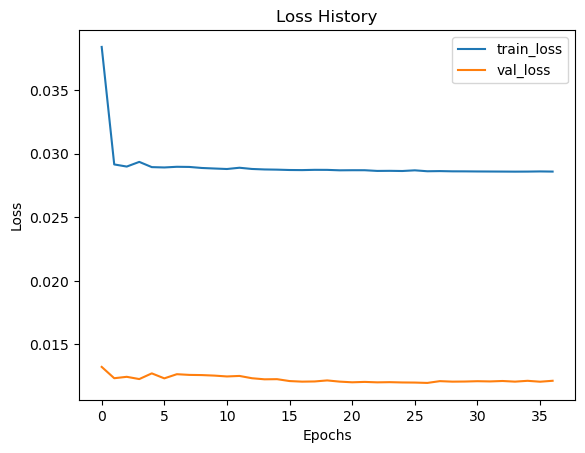

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

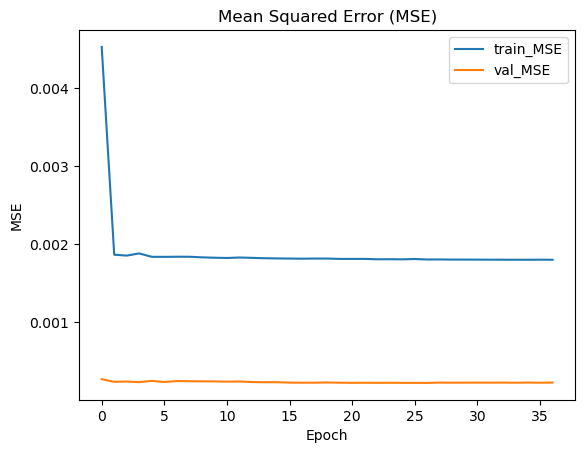

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

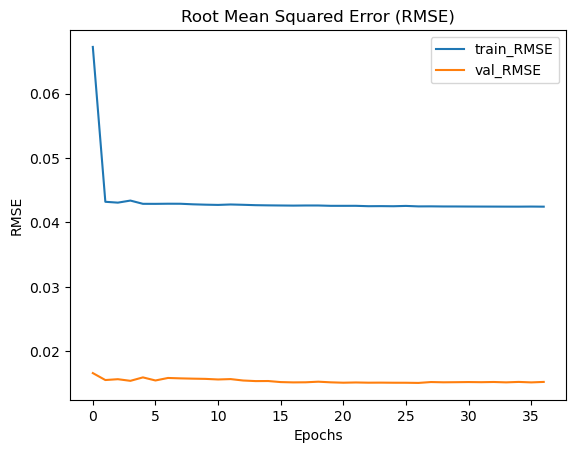

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

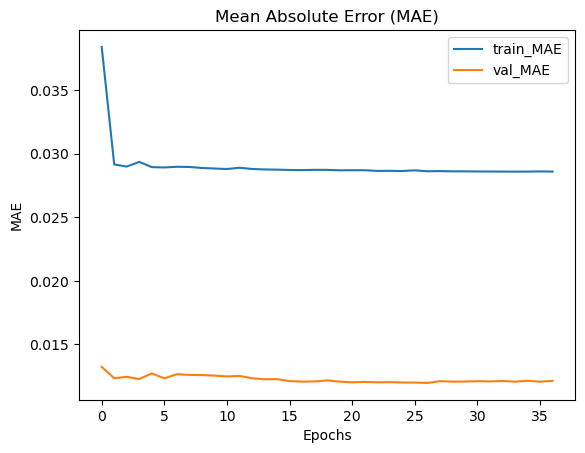

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

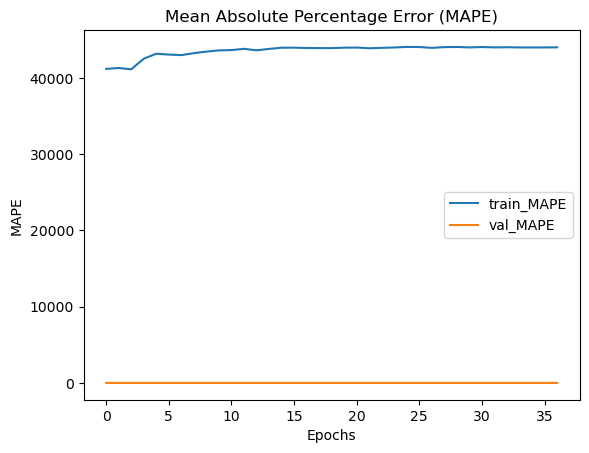

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-15 00:46:30.357750: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 4)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


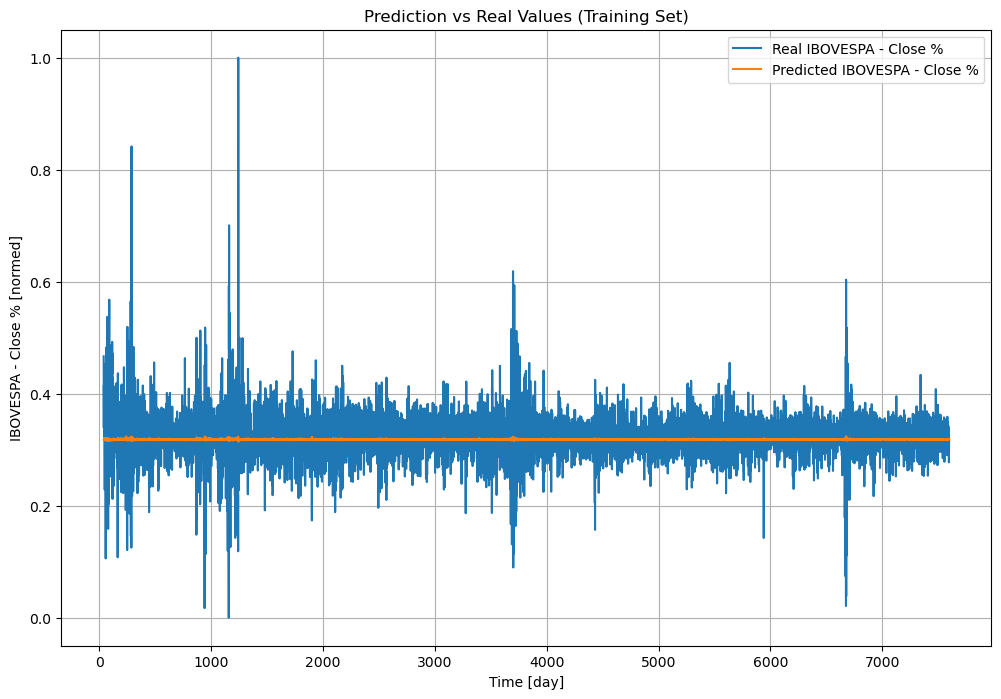

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 4)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


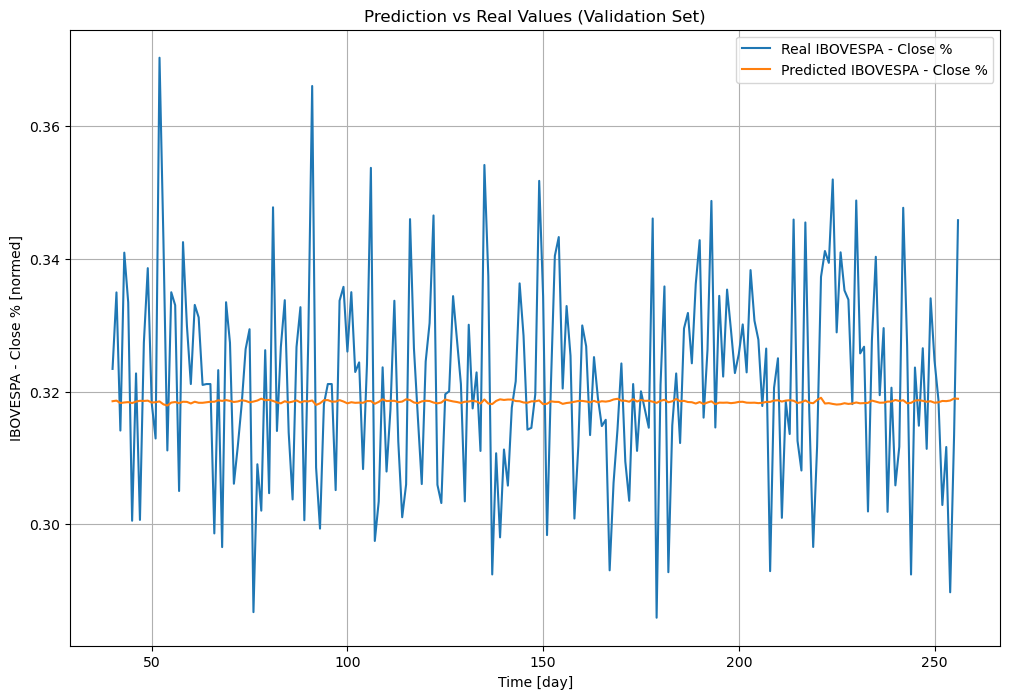

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 4)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


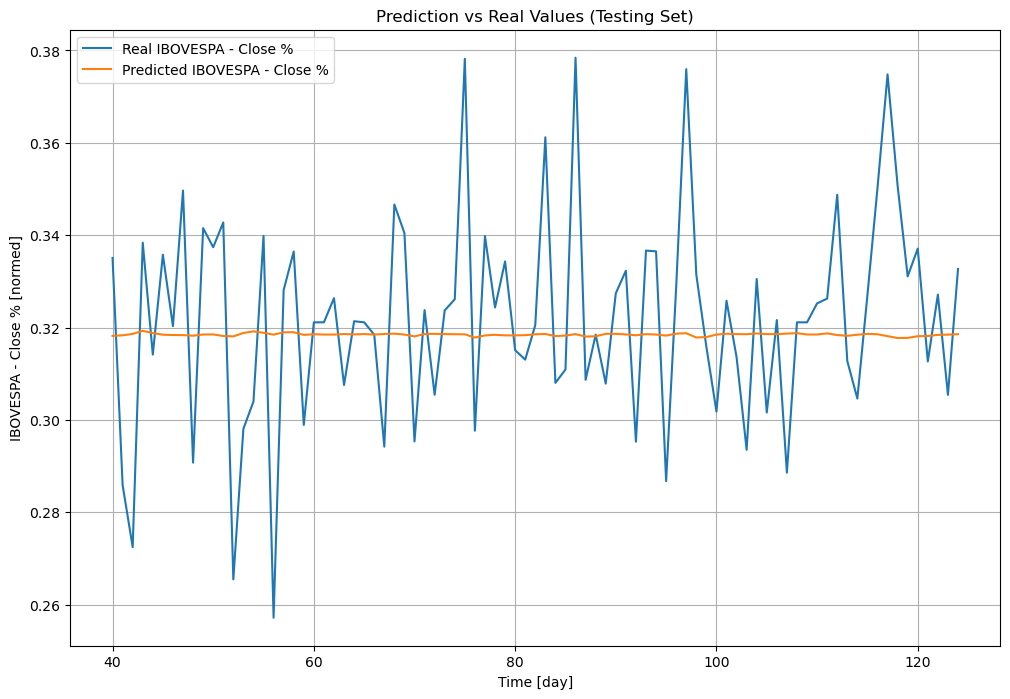

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

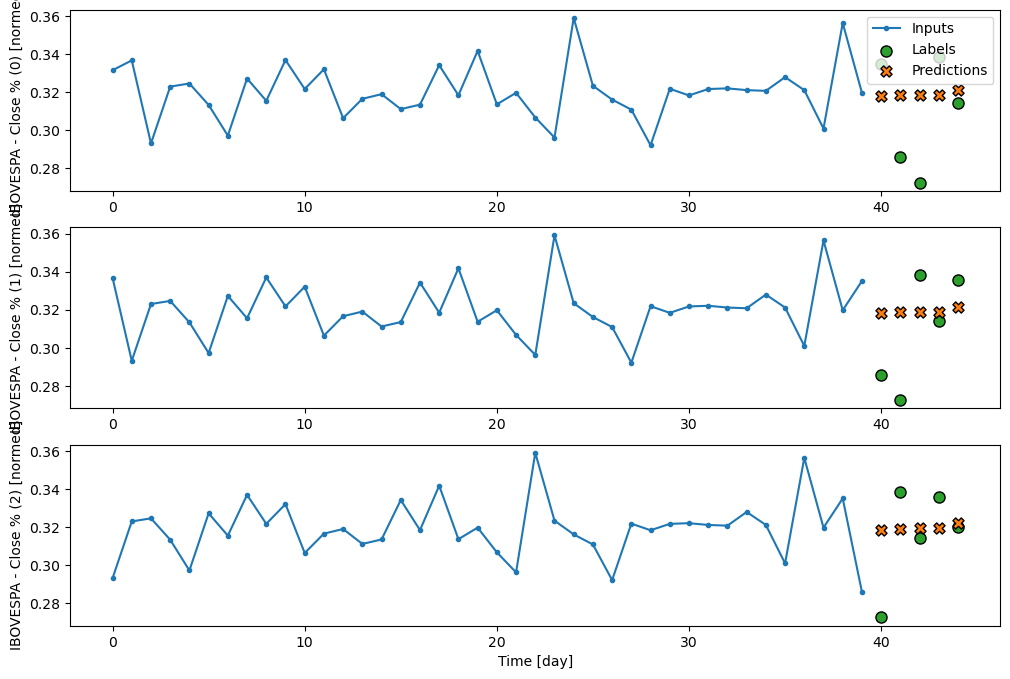

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:4m:15s:604ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


array([[[0.31820184, 0.31820184, 0.31820184, ..., 0.31820184,
         0.31820184, 0.31820184],
        [0.31852955, 0.31852955, 0.31852955, ..., 0.31852955,
         0.31852955, 0.31852955],
        [0.3184512 , 0.3184512 , 0.3184512 , ..., 0.3184512 ,
         0.3184512 , 0.3184512 ],
        [0.3186199 , 0.3186199 , 0.3186199 , ..., 0.3186199 ,
         0.3186199 , 0.3186199 ],
        [0.32112467, 0.32112467, 0.32112467, ..., 0.32112467,
         0.32006827, 0.32006827]],

       [[0.31832454, 0.31832454, 0.31832454, ..., 0.31832454,
         0.31832454, 0.31832454],
        [0.31861508, 0.31861508, 0.31861508, ..., 0.31861508,
         0.31861508, 0.31861508],
        [0.3187162 , 0.3187162 , 0.3187162 , ..., 0.3187162 ,
         0.3187162 , 0.3187162 ],
        [0.31891483, 0.31891483, 0.31891483, ..., 0.31891483,
         0.31891483, 0.31891483],
        [0.32146424, 0.32146424, 0.32146424, ..., 0.32146424,
         0.3203953 , 0.3203953 ]],

       [[0.3186302 , 0.3186302 , 0.3

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')